# Splitting spectrograms into channels

Keeping only region of interest, not the whole 10 minutes.

In [1]:
import os 
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_dir = pathlib.Path("../../kaggle_data/hms")
# base_dir = pathlib.Path("../../data/hms")
# base_dir = pathlib.Path("/kaggle/input/hms-harmful-brain-activity-classification")

In [2]:
df_traincsv = pd.read_csv(f'{base_dir}/train.csv')
df_traincsv.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
spec_id = 353733
idx = 0
df_items = df_traincsv.loc[df_traincsv.spectrogram_id == spec_id]
item = df_items.loc[idx]
df_fullspec = pd.read_parquet(f'{base_dir}/train_spectrograms/{spec_id}.parquet')
df_fullspec.replace(np.nan, 0, inplace=True)
columns = df_fullspec.columns
df_fullspec.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34


In [13]:
item

eeg_id                              1628180742
eeg_sub_id                                   0
eeg_label_offset_seconds                   0.0
spectrogram_id                          353733
spectrogram_sub_id                           0
spectrogram_label_offset_seconds           0.0
label_id                             127492639
patient_id                               42516
expert_consensus                       Seizure
seizure_vote                                 3
lpd_vote                                     0
gpd_vote                                     0
lrda_vote                                    0
grda_vote                                    0
other_vote                                   0
Name: 0, dtype: object

In [4]:
offset = item.spectrogram_label_offset_seconds
init = offset + 275
end = offset + 325
spec_roi = df_fullspec.loc[(df_fullspec.time >= init)&(df_fullspec.time < end)]
spec_roi.shape

(25, 401)

array([[ 4.45,  6.26,  5.73,  6.27,  6.88,  9.83, 10.82,  9.97,  8.59,
         3.87,  4.28,  3.32,  2.54,  2.04,  1.79,  2.75,  2.69,  2.6 ,
         2.69,  1.83,  1.78,  2.35,  1.38,  1.79,  1.39,  1.12,  0.96,
         1.44,  2.64,  3.29,  3.39,  3.28,  2.58,  1.56,  0.92,  0.54,
         0.69,  0.49,  0.45,  0.47],
       [ 7.27,  8.14, 10.4 ,  9.8 ,  7.55, 13.73, 12.13, 11.28,  9.07,
         6.34,  2.  ,  2.17,  1.54,  1.33,  1.18,  0.91,  0.91,  1.88,
         1.75,  1.88,  1.83,  1.38,  1.19,  1.5 ,  1.75,  1.55,  1.41,
         1.54,  1.02,  1.44,  1.13,  0.86,  0.56,  0.5 ,  0.32,  0.32,
         0.41,  0.53,  0.5 ,  0.54],
       [ 4.64,  5.37,  5.95,  6.02,  6.22,  6.44,  6.83,  6.88,  5.99,
         4.06,  4.03,  2.43,  2.26,  1.99,  1.13,  1.22,  0.96,  1.09,
         1.67,  2.02,  3.52,  3.41,  3.25,  3.11,  2.67,  1.11,  1.15,
         0.87,  0.6 ,  0.59,  0.56,  0.46,  0.38,  0.39,  0.5 ,  0.45,
         0.63,  0.51,  0.39,  0.39],
       [ 2.91,  3.89,  4.66,  5.55,  

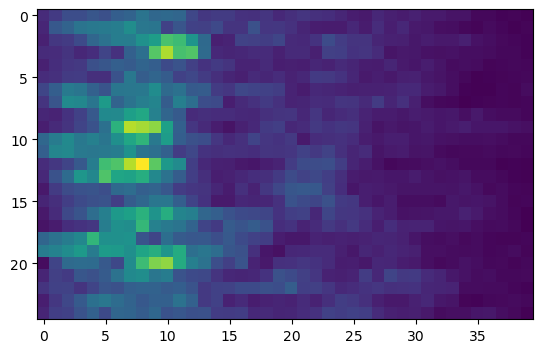

In [5]:
plt.imshow(spec_roi[columns[1:41]])

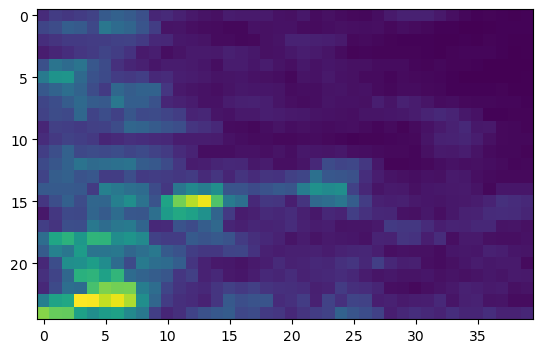

In [6]:
plt.imshow(spec_roi[columns[101:141]])


In [7]:
spec_roi.shape

(25, 401)

In [23]:
n_freq = 80
n_samples = 7
n_channels = 4
X = np.empty((n_samples, 25, n_freq, n_channels))
# x = np.empty((25, n_freq))

for c in np.arange(n_channels):
    init = c * 100 + 1
    end = init + n_freq
    X[0,:,:,c] = spec_roi[columns[init:end]].to_numpy()


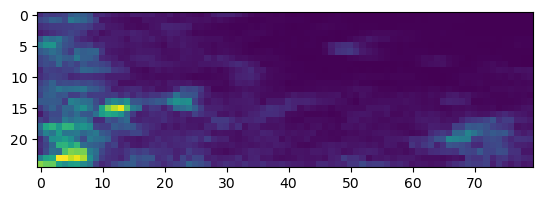

In [24]:
plt.imshow(X[0,:,:,1])

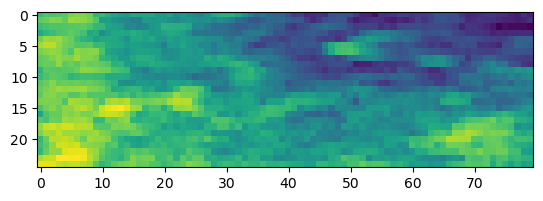

In [25]:
plt.imshow(np.log10(X[0,:,:,1]))